## Tutorials about Konia Basis

#### Kornia is a differentiable library that allows classical computer vision to be integrated into deep learning models.
#### the package uses PyTorch as its main backend both for efficiency and to take advantage of the reverse-mode auto-differentiation to define and compute the gradient of complex functions.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

### 1. transfer between image and its tensor

In [2]:
## different ways to laod a image

# with opencv
img_path = '../data/skinny dog.jpeg'
img_bgr = cv2.imread(img_path) # np.array, HxWxC, C: BGR
print(img_bgr.shape)
# with torchvision
img_rgb = torchvision.io.read_image(img_path) # torch.tensor, CxHxW, C: RGB
print(img_rgb.shape)

(841, 1280, 3)
torch.Size([3, 841, 1280])


In [3]:
## ndarray image to tensor
x_bgr = K.image_to_tensor(img_bgr) # np.array => torch.tensor, HxWxC => CxHxW, C: BGR
print(x_bgr.shape)
## BGR to RGB
x_rgb = K.color.bgr_to_rgb(x_bgr) # C: BGR => RGB
print(x_rgb.shape)

torch.Size([3, 841, 1280])
torch.Size([3, 841, 1280])


(841, 1280, 3)


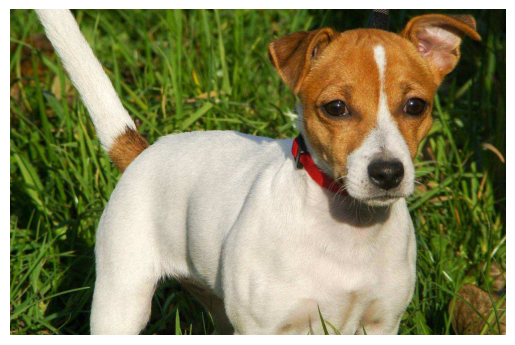

In [4]:
## tensor to ndarray image, for showing by plt
img_rgb = K.tensor_to_image(x_rgb) # torch.tensor => np.array, CxHxW => HxWxC
print(img_rgb.shape)
plt.axis("off")
plt.imshow(img_rgb)

### 2. Color Space Conversion

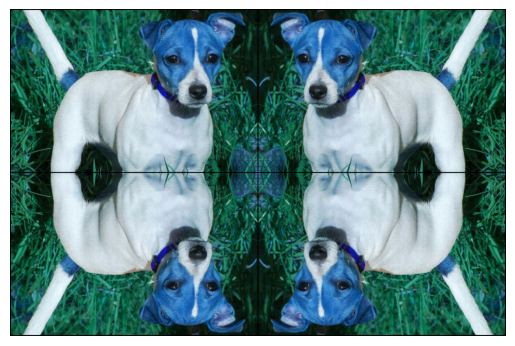

In [5]:
## perform color transformation in batch mode
xb_bgr = torch.stack([ # 1x4
    x_bgr, K.geometry.hflip(x_bgr), K.geometry.vflip(x_bgr),
    K.geometry.rot180(x_bgr)
])

def imshow(xb):
    xg = torchvision.utils.make_grid(xb, nrow=2, padding=5) # 2x2
    img_g = K.tensor_to_image(xg) # apply batch on tensor => image
    plt.axis("off")
    plt.imshow(img_g)
    
imshow(xb_bgr)

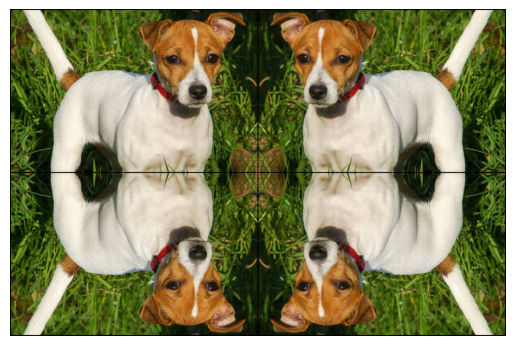

In [6]:
# apply batch on bgr => rgb
xb_rgb = K.color.bgr_to_rgb(xb_bgr) 
imshow(xb_rgb)

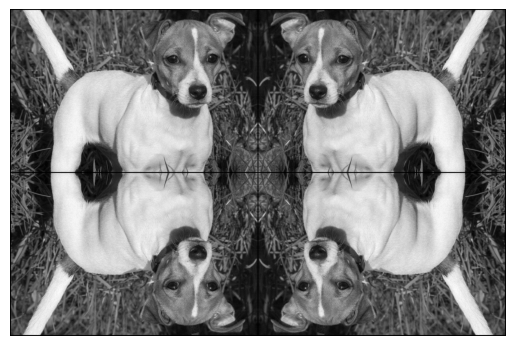

In [7]:
# apply batch on rgb => gray, and uint8 => float
xb_gray = K.color.rgb_to_grayscale(xb_rgb.float() / 255.) 
imshow(xb_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


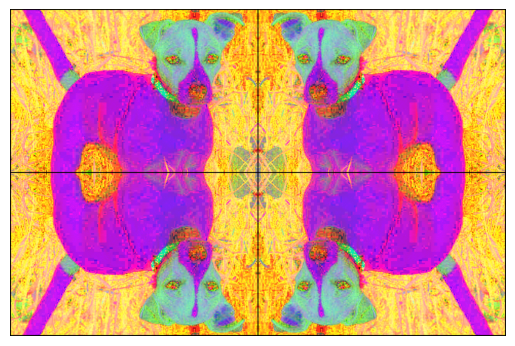

In [8]:
# apply batch on rgb => hsv, and uint8 => float
xb_hsv = K.color.rgb_to_hsv(xb_rgb.float() / 255.)
imshow(xb_hsv)

### 3. Image Enhancement

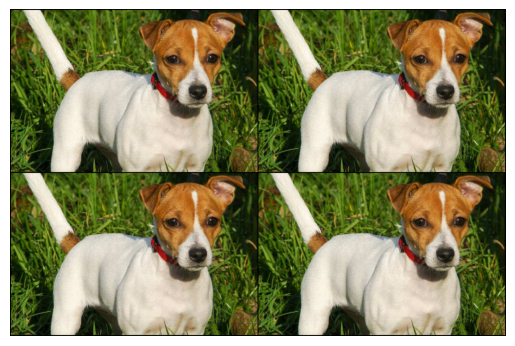

In [9]:
xb_rgb = x_rgb.expand(4, -1, -1, -1) # create a copied batch: 4xCxHxW
xb_rgb = xb_rgb.float() / 255.
imshow(xb_rgb) # original four same image

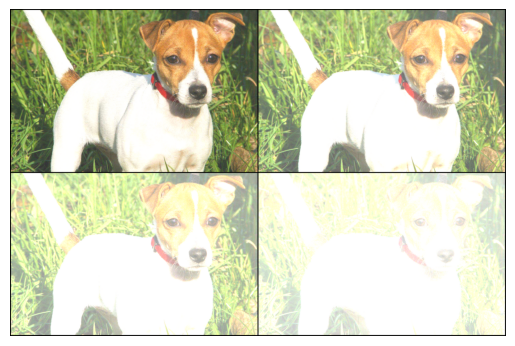

In [10]:
# adjust brightness
xb_rgb_brt = K.enhance.adjust_brightness(
    xb_rgb, torch.linspace(0.2, 0.8, 4) # brightness score: [0.2, 0.4, 0.6, 0.8]
)
imshow(xb_rgb_brt)

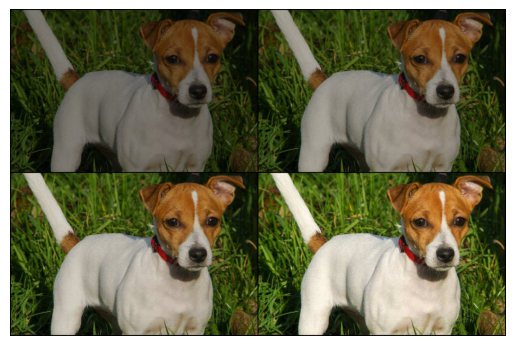

In [11]:
# adjust contrast
xb_rgb_cts = K.enhance.adjust_contrast(
    xb_rgb, torch.linspace(0.5, 1., 4) # constrast score: [0.5, 0.625, 0.75, 0.875]
)
imshow(xb_rgb_cts)

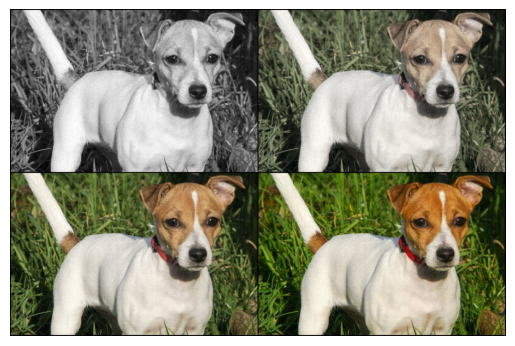

In [12]:
# adjust saturation
xb_rgb_sat = K.enhance.adjust_saturation(
    xb_rgb, torch.linspace(0, 1., 4) # saturation score : [0, 0.25, 0.75, 1]
)
imshow(xb_rgb_sat)

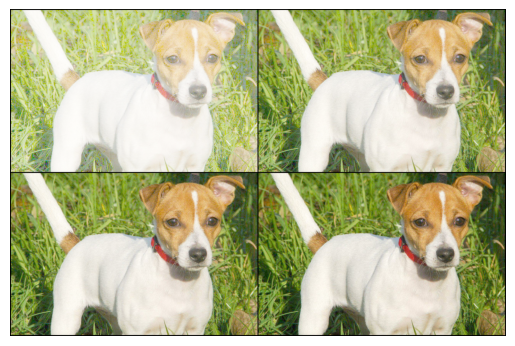

In [13]:
# adjust gamma
xb_rgb_gamma = K.enhance.adjust_gamma(
    xb_rgb, torch.tensor([0.2, 0.4, 0.5, 0.6])
)
imshow(xb_rgb_gamma)

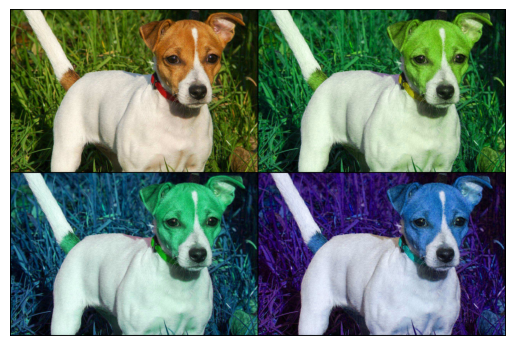

In [14]:
# adjust hue
xb_rgb_hue = K.enhance.adjust_hue(
    xb_rgb, torch.linspace(0., torch.pi, 4)
)
imshow(xb_rgb_hue)

### 4. Extracting and Combining Tensor Patches

In [15]:
########

### 5. Filtering Operators

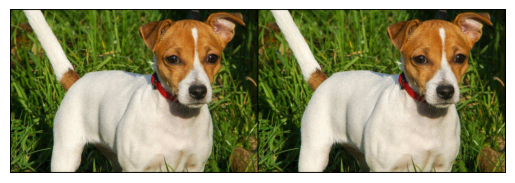

In [16]:
xb_rgb = x_rgb.expand(2, -1, -1, -1) # 2xCxHxW
xb_rgb = xb_rgb.float() / 255.
imshow(xb_rgb) # original copied image

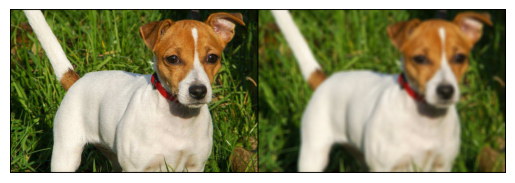

In [17]:
# box blur
xb_rgb[-1] = K.filters.box_blur(xb_rgb[0].unsqueeze(0), (20,20)).squeeze(0)
imshow(xb_rgb)

torch.Size([3, 841, 1280])
torch.Size([1, 3, 421, 640])


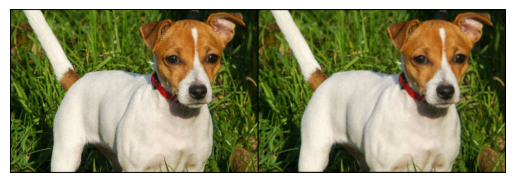

In [18]:
# average pool2d blur
x_rgb_pool = K.filters.blur_pool2d(
    xb_rgb[0].unsqueeze(0), kernel_size=9
)
xb_rgb[1] = K.geometry.resize(x_rgb_pool, size=xb_rgb[0].shape[-2:])
print(xb_rgb[0].shape)
print(x_rgb_pool.shape)
imshow(xb_rgb)

torch.Size([3, 841, 1280])
torch.Size([1, 3, 420, 640])


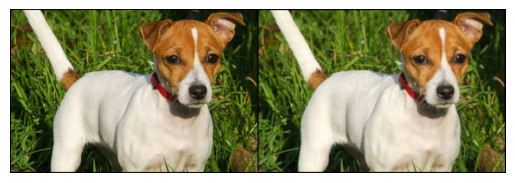

In [19]:
# max pool2d blur
x_rgb_pool = K.filters.max_blur_pool2d(
    xb_rgb[0].unsqueeze(0), kernel_size=11
)
xb_rgb[1] = K.geometry.resize(x_rgb_pool, size=xb_rgb[0].shape[-2:])
print(xb_rgb[0].shape)
print(x_rgb_pool.shape)
imshow(xb_rgb)

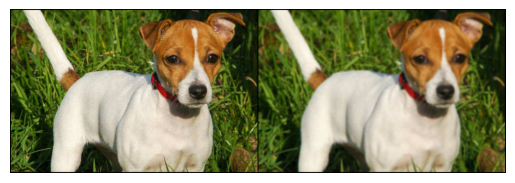

In [20]:
# gaussian blur2d
xb_rgb[-1] = K.filters.gaussian_blur2d( # or K.filters.GaussianBlur2d(mean,std)(xb_rgb[0])
    xb_rgb[0].unsqueeze(0), (11, 11), (11.0, 11.0) # mu and sigma
).squeeze(0)
imshow(xb_rgb)

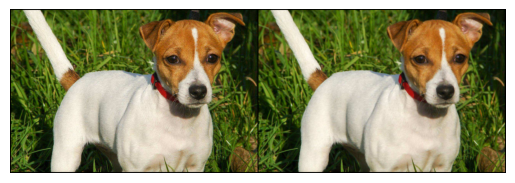

In [21]:
# median blur
xb_rgb[-1] = K.filters.median_blur(
    xb_rgb[0].unsqueeze(0), (5,5)
).squeeze(0)
imshow(xb_rgb)

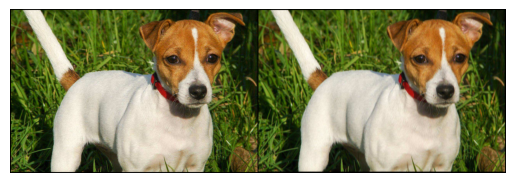

In [22]:
# motion blur
xb_rgb[-1] = K.filters.motion_blur(
    xb_rgb[0].unsqueeze(0), 9, 90., 1
).squeeze(0)
imshow(xb_rgb)

### 6. Edge Detection

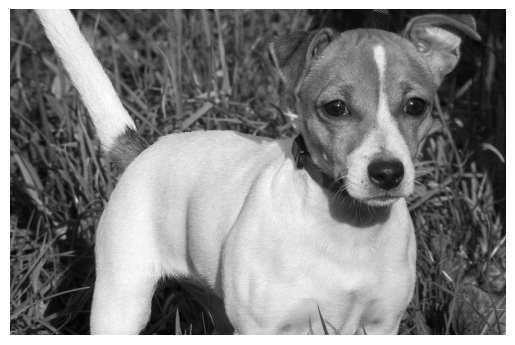

In [33]:
x_gray = K.color.rgb_to_grayscale(x_rgb.float() / 255.).unsqueeze(0) # 1x1xHxW
plt.axis("off")
plt.imshow(K.tensor_to_image(x_gray), cmap='gray')

torch.Size([1, 1, 2, 841, 1280])


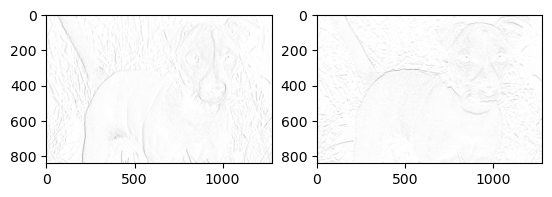

In [34]:
# 1st order derivates
x_grads = K.filters.spatial_gradient(x_gray, order=1)
print(x_grads.shape) # 1x1x2xHxW
plt.axis("off")
plt.subplot(1,2,1)
plt.imshow(1. - K.tensor_to_image(x_grads[:,:,0].clamp(0.,1.)), cmap='gray') # grad x
plt.subplot(1,2,2)
plt.imshow(1. - K.tensor_to_image(x_grads[:,:,1].clamp(0.,1.)), cmap='gray') # grad y

torch.Size([1, 1, 3, 841, 1280])


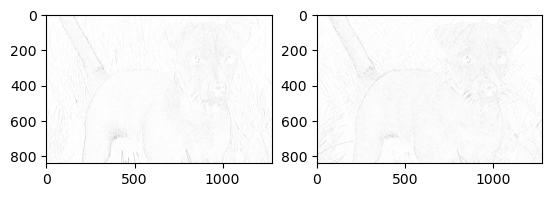

In [35]:
# 2nd order derivates
x_grads = K.filters.spatial_gradient(x_gray, order=2)
print(x_grads.shape) # 1x1x2xHxW
plt.axis("off")
plt.subplot(1,2,1)
plt.imshow(1. - K.tensor_to_image(x_grads[:,:,0].clamp(0.,1.)), cmap='gray') # grad x
plt.subplot(1,2,2)
plt.imshow(1. - K.tensor_to_image(x_grads[:,:,1].clamp(0.,1.)), cmap='gray') # grad y

torch.Size([1, 1, 841, 1280])


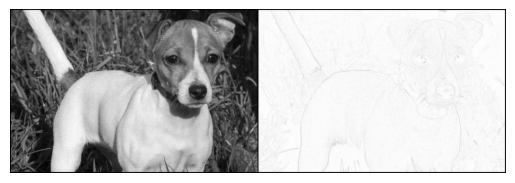

In [41]:
# sobel
x_sobel = K.filters.sobel(x_gray)
print(x_sobel.shape)
imshow(
    torch.stack([
        x_gray.squeeze(0), 1. - x_sobel.squeeze(0)
    ])
)

torch.Size([1, 1, 841, 1280])


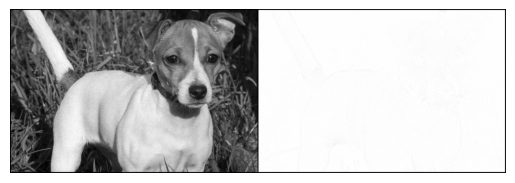

In [43]:
# laplacian 
x_lap = K.filters.laplacian(x_gray, kernel_size=5)
print(x_lap.shape)
imshow(
    torch.stack([
        x_gray.squeeze(0), 1. - x_lap.squeeze(0).clamp(0., 1.)
    ])
)

torch.Size([1, 1, 841, 1280])


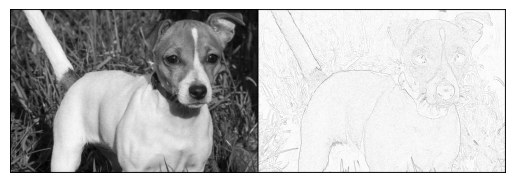

In [45]:
# canny
x_canny = K.filters.canny(x_gray)[0]
print(x_canny.shape)
imshow(
    torch.stack([
        x_gray.squeeze(0), 1. - x_canny.squeeze(0).clamp(0., 1.)
    ])
)

### 7. Morphological Operators

In [47]:
from kornia import morphology as morph
device = 'cpu' # 'cuda:0' for GPU
kernel = torch.tensor([[0, 1, 0],[1, 1, 1],[0, 1, 0]]).to(device)
img_t = (x_rgb.float() / 255.).unsqueeze(0) # 1xCxHxW
print(kernel)
print(img_t.shape)

tensor([[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]])
torch.Size([1, 3, 841, 1280])


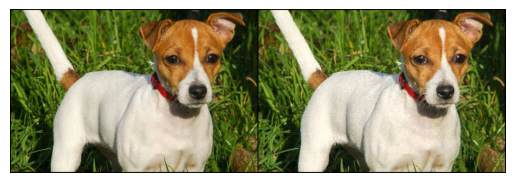

In [48]:
# dilation
img_dil = morph.dilation(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), img_dil.squeeze(0).clamp(0., 1.)
    ])
)

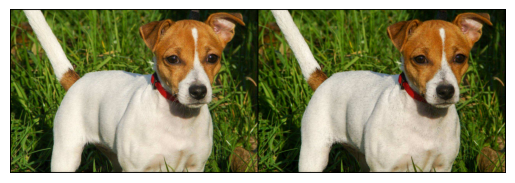

In [49]:
# erosion
img_ero = morph.erosion(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), img_ero.squeeze(0).clamp(0., 1.)
    ])
)

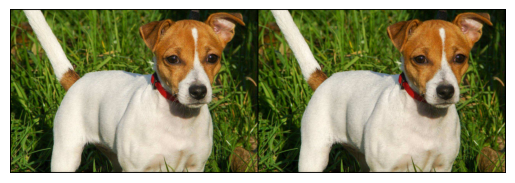

In [50]:
# open
img_op = morph.opening(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), img_op.squeeze(0).clamp(0., 1.)
    ])
)

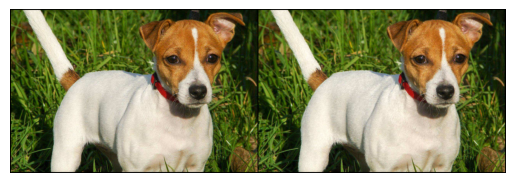

In [51]:
# close
img_cl = morph.closing(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), img_cl.squeeze(0).clamp(0., 1.)
    ])
)

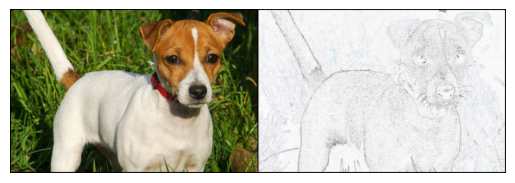

In [54]:
# morphological gradient
img_gra = morph.gradient(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), 1. - img_gra.squeeze(0).clamp(0., 1.)
    ])
)

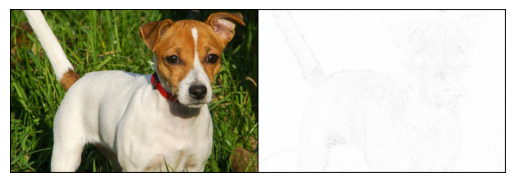

In [55]:
# bottom hat
img_bh = morph.bottom_hat(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), 1. - img_bh.squeeze(0).clamp(0., 1.)
    ])
)

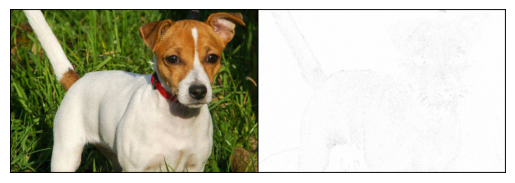

In [56]:
# top hat
img_th = morph.top_hat(img_t, kernel)
imshow(
    torch.stack([
        img_t.squeeze(0), 1. - img_th.squeeze(0).clamp(0., 1.)
    ])
)

### 8. Perspective Warp

In [94]:
# load image
img = cv2.imread("../data/billboard.jpeg") # HxWxC, BGR
img = K.image_to_tensor(img, keepdim=False) # 1xCxHxW, BGR
img = K.color.bgr_to_rgb(img) # 1xCxHxW, RGB
print(img.shape)

torch.Size([1, 3, 682, 1024])


In [95]:
# define src points and dst points
src = torch.tensor([[ # counter-clockwise
    [480., 30.], # top left
    [835., 108.], # top right # counter-clockwise
    [828., 350.], # bottom right
    [475., 315.], # bottom left
]])

h,w = 128, 180
dst = torch.tensor([[
    [0., 0.], # top left
    [w - 1., 0.], # top right
    [w - 1., h - 1.], # bottom right
    [0., h - 1.], # bottom left
]])
print(src.shape)

torch.Size([1, 4, 2])


(-0.5, 1023.5, 681.5, -0.5)

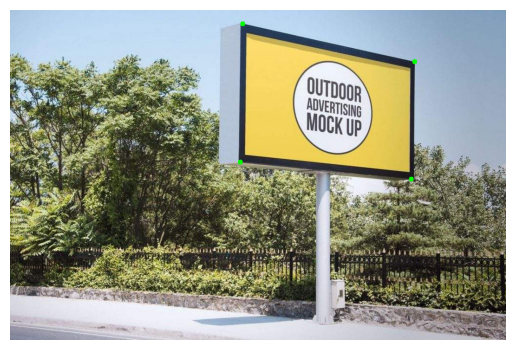

In [96]:
# check src points
img_np = K.tensor_to_image(img.byte())

for i in range(4):
    corner = tuple(src[0,i].long().numpy())
    img_np = cv2.circle(img_np.copy(), corner, 5, (0, 255, 0), -1)
plt.imshow(img_np)
plt.axis("off")

In [97]:
# get perspective matrix
M = K.geometry.get_perspective_transform(src, dst)
img_warp = K.geometry.warp_perspective(img.float(), M, dsize=(h,w))
print(img_warp.shape)

torch.Size([1, 3, 128, 180])


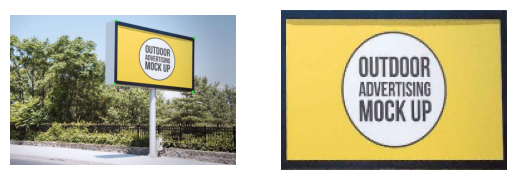

In [98]:
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_np)
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(K.tensor_to_image(img_warp.byte()))

### 9. Rotation

In [101]:
# create rotation transformation(angle vector)
alpha: float = 45.0  # in degrees
angle: torch.tensor = torch.ones(1) * alpha

# define the rotation center point
center: torch.tensor = torch.ones(1, 2)
center[..., 0] = img_warp.shape[3] / 2  # x
center[..., 1] = img_warp.shape[2] / 2  # y

# define the scale factor vector
scale: torch.tensor = torch.ones(1, 2) # no scale

# compute the rotation transformation matrix
M: torch.tensor = K.geometry.get_rotation_matrix2d(center, angle, scale)  # 1x2x3
print(M.shape)

torch.Size([1, 2, 3])


torch.Size([1, 3, 128, 180])


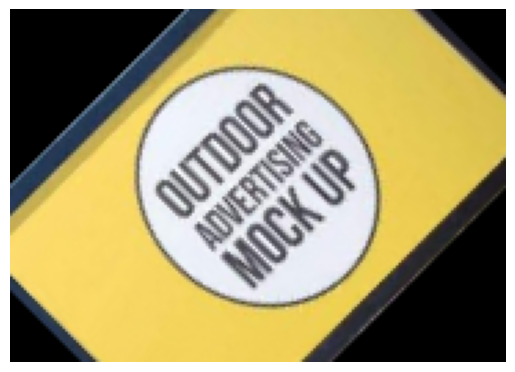

In [103]:
# rotation by warping affine
img_rot = K.geometry.warp_affine(img_warp, M, dsize=(h,w))
print(img_rot.shape)
plt.axis("off")
plt.imshow(K.tensor_to_image(img_rot.byte()))